In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/MyDrive/Colab Notebooks/practice

/content/drive/MyDrive/Colab Notebooks/practice


# Description of dataset

## Dataset

1.	ID: ID of each client
2.	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3.	SEX: Gender (1=male, 2=female)
4.	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5.	MARRIAGE: Marital status (1=married, 2=single, 3=others)
6.	AGE: Age in years
7.	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8.	PAY_2: Repayment status in August, 2005 (scale same as above)
9.	PAY_3: Repayment status in July, 2005 (scale same as above)
10.	PAY_4: Repayment status in June, 2005 (scale same as above)
11.	PAY_5: Repayment status in May, 2005 (scale same as above)
12.	PAY_6: Repayment status in April, 2005 (scale same as above)
13.	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14.	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15.	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16.	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17.	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18.	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19.	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20.	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21.	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22.	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23.	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24.	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25.	default.payment.next.month: Default payment (1=yes, 0=no)



# imports

In [ ]:
# !pip install scikit-learn==0.23.2
# !pip install numpy==1.20

In [ ]:
# import sklearn, numpy
# sklearn.__version__, numpy.__version__

('0.23.2', '1.20.0')

In [7]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE

import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# !pip uninstall scikit-learn -y
# !pip uninstall numpy -y

In [ ]:
# !pip install numpy==1.20
# !pip install pycaret

In [ ]:
# import pycaret
# # from pycaret.datasets import get_data
# from pycaret.classification import *

# from pycaret.utils import enable_colab
# enable_colab()

Colab mode enabled.


# code

In [8]:
df = pd.read_csv('UCI_Credit_Card.csv')

df.drop('ID', axis=1, inplace=True)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.drop_duplicates(inplace=True)

print('shape of dataset - ', df.shape)
print()

df.head()

shape of dataset -  (29965, 24)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29965 non-null  float64
 1   SEX        29965 non-null  int64  
 2   EDUCATION  29965 non-null  int64  
 3   MARRIAGE   29965 non-null  int64  
 4   AGE        29965 non-null  int64  
 5   PAY_0      29965 non-null  int64  
 6   PAY_2      29965 non-null  int64  
 7   PAY_3      29965 non-null  int64  
 8   PAY_4      29965 non-null  int64  
 9   PAY_5      29965 non-null  int64  
 10  PAY_6      29965 non-null  int64  
 11  BILL_AMT1  29965 non-null  float64
 12  BILL_AMT2  29965 non-null  float64
 13  BILL_AMT3  29965 non-null  float64
 14  BILL_AMT4  29965 non-null  float64
 15  BILL_AMT5  29965 non-null  float64
 16  BILL_AMT6  29965 non-null  float64
 17  PAY_AMT1   29965 non-null  float64
 18  PAY_AMT2   29965 non-null  float64
 19  PAY_AMT3   29965 non-null  float64
 20  PAY_AM

In [10]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [22]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Предположение:
Чем меньше клиент взял кредит, тем больше вероятность, что он его вернет

*   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
*   default: default payment

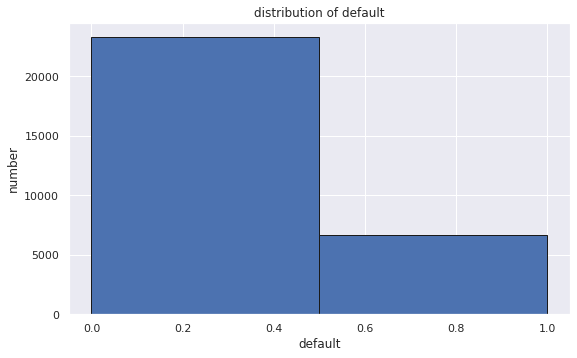

Counter({1: 6630, 0: 23335})

In [77]:
# target value - default
sns.set()
plt.figure(figsize=(8, 5))

plt.hist(df.default, bins = 2, edgecolor = 'k')

plt.xlabel('default')
plt.ylabel('number')
plt.title('distribution of default') 
plt.show()

print()
Counter(df.default) # imbalance

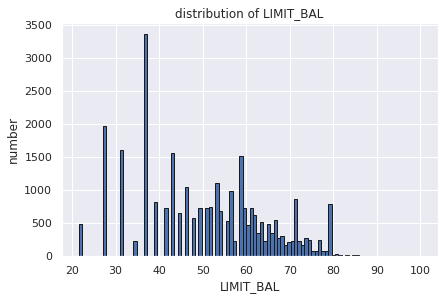

In [82]:
sns.set()
plt.hist(np.cbrt(df['LIMIT_BAL']), bins=100, edgecolor='k')

plt.xlabel('LIMIT_BAL')
plt.ylabel('number')
plt.title('distribution of LIMIT_BAL') 
plt.show()

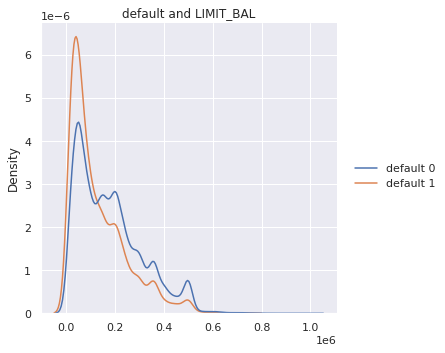

In [92]:
sns.displot({'default 0': df[df.default==0].LIMIT_BAL,
              'default 1': df[df.default==1].LIMIT_BAL}, kind='kde', common_norm=False)

plt.title('default and LIMIT_BAL') 
plt.show()

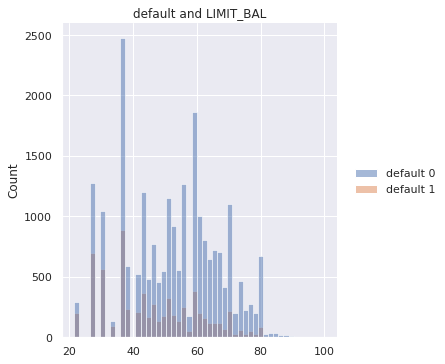

In [93]:
sns.displot({'default 0': np.cbrt(df[df.default==0].LIMIT_BAL),
              'default 1': np.cbrt(df[df.default==1].LIMIT_BAL)}, common_norm=False)

plt.title('default and LIMIT_BAL') 
plt.show()

In [88]:
stat_df = pd.DataFrame(columns=['median', 'mean'])
stat_df['median'] = df.groupby('default')['LIMIT_BAL'].median()
stat_df['mean'] = df.groupby('default')['LIMIT_BAL'].mean()

stat_df # видно, что медиана и среднее для 1 ниже, чем для 0. То есть, с уменьшением размера кредита, вероятность выплаты увеличивается

,median,mean
default,,
0,150000.0,178084.508249
1,90000.0,129984.567119


In [102]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


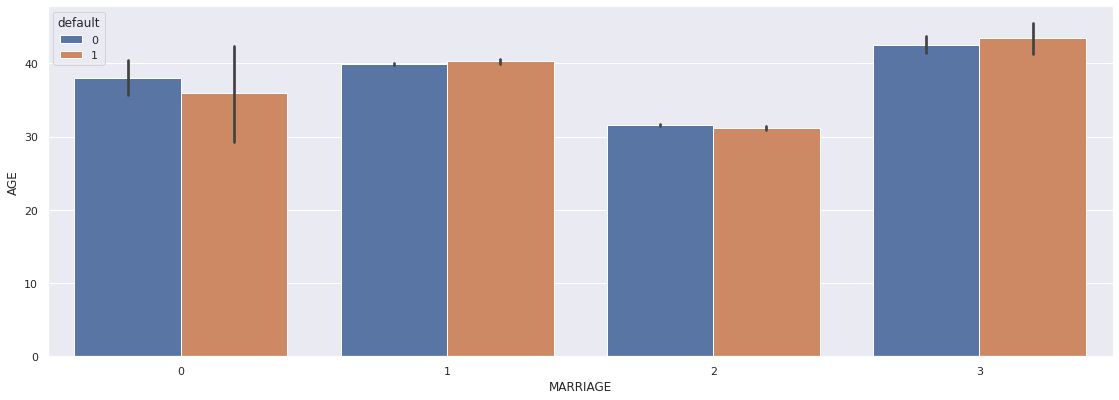

In [112]:
# нет зависимости
plt.figure(figsize=(17, 6))
sns.barplot(x='MARRIAGE', y='AGE', data=df, hue='default')
plt.show()

In [ ]:
z = np.abs(stats.zscore(df))

df_clean = df[(z < 3).all(axis=1)]

for col in df_clean.columns[5:23]:
  df_clean[col] = np.cbrt(df_clean[col])

In [95]:
print(df_clean.shape)
df_clean.sample(5)

(26396, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
8798,360000.0,2,2,1,36,0.000000,0.000000,1.259921,0.000000,0.000000,...,36.842525,37.793898,29.340420,24.662121,2.223980,27.144176,17.099759,0.000000,33.322219,0
15224,60000.0,2,2,2,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.428438,38.598108,38.774504,12.661894,12.771143,12.563411,13.005914,13.572088,13.005914,0
2442,240000.0,1,3,1,55,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.389369,30.899780,31.761905,13.572088,12.599210,12.599210,12.599210,14.422496,12.599210,0
1625,20000.0,1,3,1,63,1.259921,1.259921,1.259921,1.259921,1.259921,...,25.777189,25.573414,25.844735,11.186889,8.879040,8.434327,0.000000,9.283178,9.173585,1
18947,290000.0,2,2,1,32,1.000000,1.259921,0.000000,0.000000,0.000000,...,51.484301,51.542460,50.939439,11.454769,17.544106,17.324782,17.099759,16.711391,17.099759,0


24it [00:01, 15.30it/s]


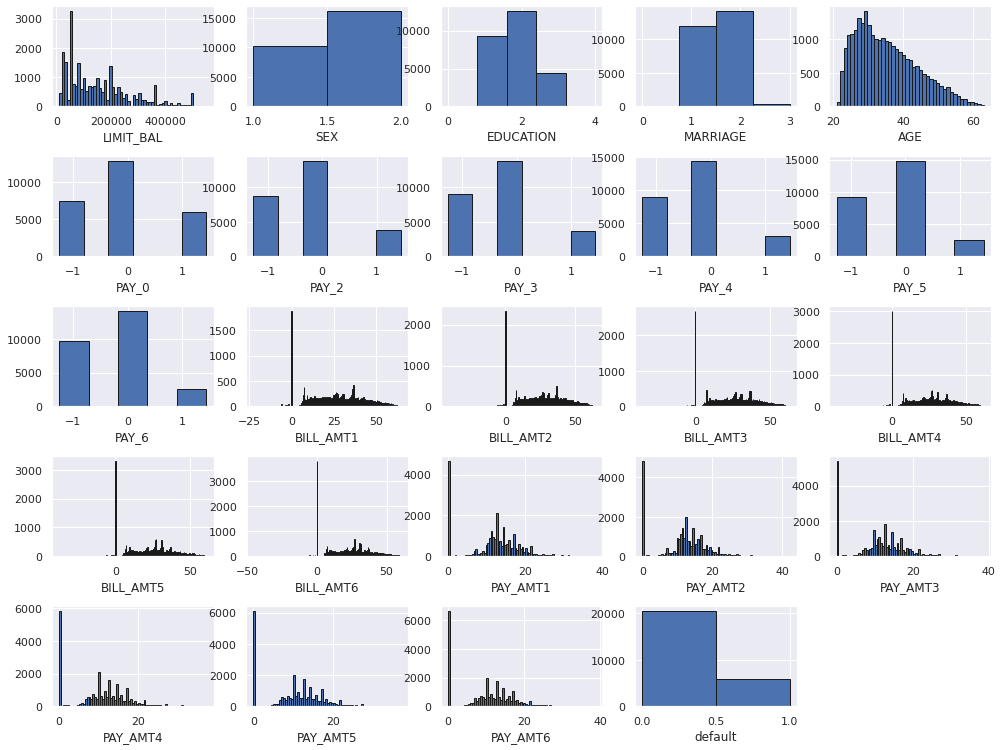

In [96]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

ncols = 5
nrows = len(df_clean.columns) // ncols + (len(df_clean.columns) % ncols > 0)


for ind, col in tqdm(enumerate(df_clean.columns)):

  ax = plt.subplot(nrows, ncols, ind + 1)

  if df_clean[f'{col}'].nunique() > 3000:
    bins = int(df_clean[f'{col}'].nunique() * 0.013)

  elif df_clean[f'{col}'].nunique() > 1500:
    bins = int(df_clean[f'{col}'].nunique() * 0.15)
  else: 
    bins = df_clean[f'{col}'].nunique()

  plt.hist(df_clean[f'{col}'], bins=bins, edgecolor='k')
  ax.set_xlabel(f'{col}')



plt.show()

In [ ]:
# Много значений 0 по выплатам (BILL_AMT и PAY_AMT), так как класс default несбалансированный в сторону невыплат.

24it [00:00, 28.88it/s]


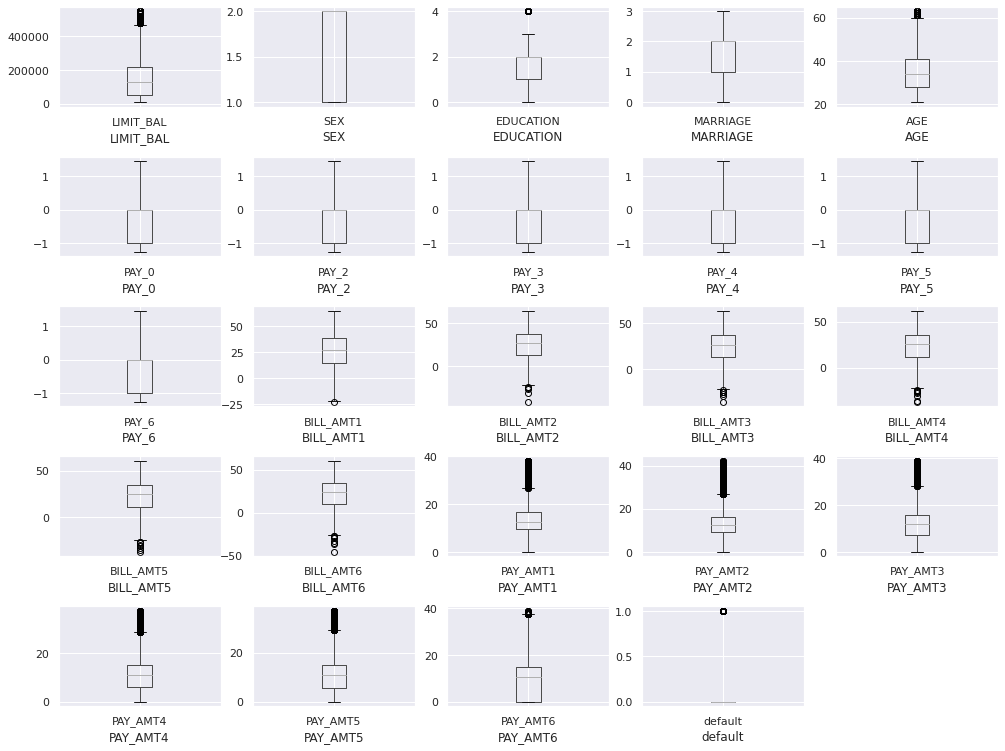

In [98]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

ncols = 5
nrows = len(df_clean.columns) // ncols + (len(df_clean.columns) % ncols > 0)

sns.set_style('darkgrid')

for ind, col in tqdm(enumerate(df_clean.columns)):

  ax = plt.subplot(nrows, ncols, ind + 1)

  df_clean.boxplot(f'{col}')
  ax.set_xlabel(f'{col}')



plt.show()

In [101]:
# corr with target
correlations_data = pd.DataFrame(df_clean.corr()['default'].abs().sort_values())
correlations_data

,default
BILL_AMT5,0.000517
BILL_AMT4,0.002848
BILL_AMT6,0.005615
BILL_AMT3,0.007241
BILL_AMT2,0.011707
AGE,0.013560
MARRIAGE,0.024822
BILL_AMT1,0.025060
SEX,0.038896
EDUCATION,0.040974
